In [1]:
import tbapy
import matplotlib.pyplot as plt

tba = tbapy.TBA("gl4GXuoqG8anLUrLo356LIeeQZk15cfSoXF72YT3mYkI38cCoAmReoCSSF4XWccQ")

In [2]:
def get_old_rp(match, alliance):
    if match['comp_level'] != 'qm':
        return None
    rps = 0
    if len(match["score_breakdown"][alliance]["links"]) > (4 if match["score_breakdown"][alliance]["coopertitionCriteriaMet"] else 5):
        rps += 1
    if match["score_breakdown"][alliance]["sustainabilityBonusAchieved"]:
        rps += 1
    if match["winning_alliance"] == alliance:
        rps += 2
    elif match["winning_alliance"] == "":
        rps += 1
    return rps

def get_new_rp(match, alliance):
    if match['comp_level'] != 'qm':
        return None
    rps = 0
    if len(match["score_breakdown"][alliance]["links"]) > (5 if match["score_breakdown"][alliance]["coopertitionCriteriaMet"] else 6):
        rps += 1
    if match["score_breakdown"][alliance]["sustainabilityBonusAchieved"]:
        rps += 1
    if match["winning_alliance"] == alliance:
        rps += 2
    elif match["winning_alliance"] == "":
        rps += 1
    return rps

In [31]:
events = tba.events(2023, simple=True)  # Get all events for 2023
events = filter(lambda x: x["event_type"] in [2,5], events) # Only DCMP events

quals = []
elims = []
rank_change = []

for event in events:
    print(event["name"])
    
    old_rps = {}
    new_rps = {}

    matches = tba.event_matches(event["key"])  # Get all matches for event
    for match in matches:
        if match["comp_level"] == "qm": # Qualification match
            # Add game piece count to quals list
            quals.append(match["score_breakdown"]["red"]["teleopGamePieceCount"])
            quals.append(match["score_breakdown"]["blue"]["teleopGamePieceCount"])

            # Calculate old and new RPs & avg match score (1st tiebreaker)
            for team in match["alliances"]["red"]["team_keys"]:
                if team not in old_rps:
                    old_rps[team] = [0,0]
                    new_rps[team] = [0,0]
                old_rps[team][0] += get_old_rp(match, "red")
                old_rps[team][1] += match["alliances"]["red"]["score"]
                new_rps[team][0] += get_new_rp(match, "red")
                new_rps[team][1] += match["alliances"]["red"]["score"]
            for team in match["alliances"]["blue"]["team_keys"]:
                if team not in old_rps:
                    old_rps[team] = [0,0]
                    new_rps[team] = [0,0]
                old_rps[team][0] += get_old_rp(match, "blue")
                old_rps[team][1] += match["alliances"]["blue"]["score"]
                new_rps[team][0] += get_new_rp(match, "blue")
                new_rps[team][1] += match["alliances"]["blue"]["score"]
        
        else:   # Elimination match
            # Add game piece count to elims list
            elims.append(match["score_breakdown"]["red"]["teleopGamePieceCount"])
            elims.append(match["score_breakdown"]["blue"]["teleopGamePieceCount"])
    
    # Sort teams by RPs and calculate rank change
    old_rps = dict(zip([team for team,rps in sorted(old_rps.items(), key=lambda x: x[1], reverse=True)], range(1, len(old_rps)+1)))
    new_rps = dict(zip([team for team,rps in sorted(new_rps.items(), key=lambda x: x[1], reverse=True)], range(1, len(new_rps)+1)))
    for team, old_rank in old_rps.items():
        rank_change.append(new_rps[team] - old_rank)

FIRST Chesapeake District Championship
Peachtree District Championship
FIRST Indiana State Championship
FIRST Israel District Championship
FIRST in Michigan State Championship presented by DTE Foundation
FIRST in Michigan State Championship presented by DTE Foundation - DTE ENERGY FOUNDATION Division
FIRST in Michigan State Championship presented by DTE Foundation - FORD Division
FIRST in Michigan State Championship presented by DTE Foundation - APTIV Division
FIRST in Michigan State Championship presented by DTE Foundation - CONSUMERS ENERGY Division
FIRST Mid-Atlantic District Championship
FIRST North Carolina District State Championship
New England FIRST District Championship
New England FIRST District Championship - MEIR Division
New England FIRST District Championship - WILSON Division
FIRST Ontario Provincial Championship
FIRST Ontario Provincial Championship - TECHNOLOGY Division
FIRST Ontario Provincial Championship - SCIENCE Division
Pacific Northwest FIRST District Championsh

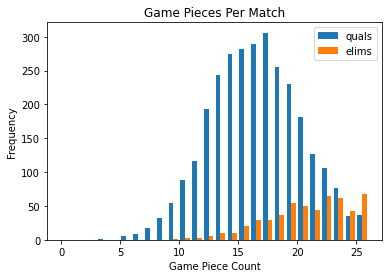

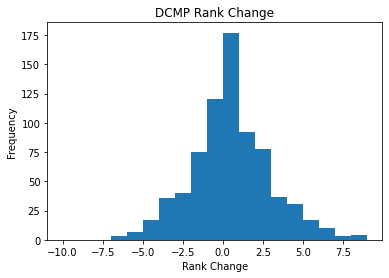

In [32]:
# Plot game piece count histograms
plt.figure()
bins = range(0,27)
plt.hist([quals, elims], bins=bins, label=["quals", "elims"])
plt.title("DCMP Game Pieces Per Match")
plt.xlabel("Game Piece Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot rank change histogram
plt.figure()
plt.hist(rank_change, bins=range(-10,10))
plt.title("DCMP Rank Change")
plt.xlabel("Rank Change")
plt.ylabel("Frequency")
plt.show()